In [1]:
from HGCal_ImageAlgo3D import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('dark_background')
plt.rc("figure",facecolor="k",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/home/zchen/Documents/ImageAlogrithm3D/data/'
DatasetFile = 'CMSSW9304_partGun_PDGid22_x1000_E300.0To300.0_NTUP'
#%run ../scripts/utility_makeinput.py $DatasetDir $DatasetFile 3 100

In [2]:
df = pd.read_pickle(DatasetDir+"input/"+DatasetFile+"_rechit.pkl")

## 1. Testing the running time

In [3]:
imagalgo = ImagingAlgo()
runnrect,runtime   = [],[]

for ishower in tqdm.tqdm(np.arange(1,40,2)):
    df_test = df[(df.id<=ishower) & (df.id>0)]
    runnrect.append( len(df_test) )
    timeishower = np.zeros(10)
    
    for run in range(10):
        time0 = timer()
        _,__  = imagalgo.ImageAlgorithm_cuda(df_test,0)
        time1 = timer()
        timeishower[run] = time1-time0
    runtime.append(timeishower)
runnrect,runtime = np.array(runnrect), np.array(runtime)

100%|██████████| 20/20 [00:32<00:00,  1.63s/it]


In [4]:
#np.savetxt("../data/performance/nrech.csv",runnrect, delimiter=",")
#np.savetxt("../data/performance/Inter_i7-4850HQ.csv", runtime, delimiter=",")
#np.savetxt("../data/performance/Inter_Iris-Pro-5200.csv" ,runtime, delimiter=",")
#np.savetxt("../data/performance/Nvidia_GT750M.csv",runtime, delimiter=",")
#np.savetxt("../data/performance/Nvidia_GT750M_cuda.csv",runtime, delimiter=",")
np.savetxt("../data/performance/Nvidia_GTX1080Ti_cuda.csv",runtime, delimiter=",")
np.savetxt("../data/performance/nrech.csv",runnrect, delimiter=",")

## 2. Read previous test

In [5]:
cpu    = np.genfromtxt("../data/performance/Inter_i7-4850HQ.csv", delimiter=",")
iris   = np.genfromtxt("../data/performance/Inter_Iris-Pro-5200.csv" , delimiter=",")
nvidia = np.genfromtxt("../data/performance/Nvidia_GT750M.csv", delimiter=",")
nvidia_cuda = np.genfromtxt("../data/performance/Nvidia_GT750M_cuda.csv", delimiter=",")
nrect  = np.genfromtxt("../data/performance/nrech.csv", delimiter=",")

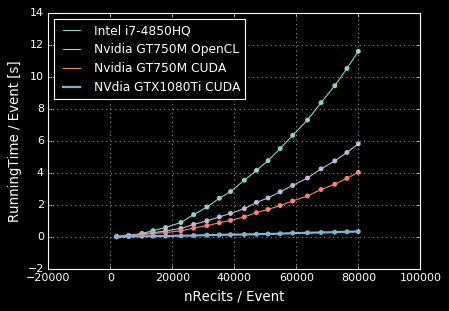

In [6]:


testlist = [cpu,nvidia,nvidia_cuda]
namelist = ['Intel i7-4850HQ',#'Intel Iris-Pro-5200',
            'Nvidia GT750M OpenCL','Nvidia GT750M CUDA']
colorlist= ["C0","C2","C3"]

for i in range(len(testlist)):
    test_,name_,color_ = testlist[i],namelist[i],colorlist[i] 
    value = np.mean(test_,axis=1)
    delta = np.std(test_,axis=1)
    plt.plot(nrect, value, c=color_, lw=1,label=name_)
    plt.scatter(nrect, value, c=color_,marker="o",edgecolor='None')
    
plt.plot(runnrect,np.mean(runtime,axis=1), color='C4',lw=2,label='NVdia GTX1080Ti CUDA')
plt.scatter(runnrect,np.mean(runtime,axis=1), color='C4',marker="o",edgecolor='None')
plt.grid(True)
    
plt.xlabel("nRecits / Event",fontsize=12)
plt.ylabel("RunningTime / Event [s]",fontsize=12)
plt.legend(fontsize=11,loc='upper left')
plt.savefig("../plot/test_final.png")

In [18]:
runnrect

array([ 2002,  5882, 10169, 13742, 17828, 22754, 26860, 31168, 35155,
       38771, 43215, 47132, 50864, 54775, 58815, 63589, 67960, 72393,
       76305, 79974])

In [17]:
nrect

array([  1858.,   5825.,  10165.,  13874.,  17588.,  21763.,  26733.,
        31069.,  35100.,  38746.,  42866.,  47174.,  50774.,  54708.,
        58796.,  63191.,  67942.,  71856.,  76092.,  79980.])